# 資優生策略

In [7]:
import pandas as pd

def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()

def mystrategy2(data):
    
    股本 = data.get('股本合計', 1)#.drop_duplicates(['stock_id', 'date'], keep='last')#.pivot(index='date', columns='stock_id')
    price = data.get('收盤價', 200)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    rsv = (price.iloc[-1] - price.iloc[-150:].min()) / (price.iloc[-150:].max() - price.iloc[-150:].min())
    
    
    condition1 = (市值 < 1e10)
    condition2 = 自由現金流 > 0
    condition3 = 股東權益報酬率 > 0
    condition4 = 營業利益成長率 > 0
    condition5 = 市值營收比 < 5
    condition6 = rsv > 0.5
       
    select_stock = condition1 & condition2 & condition3 & condition4 & condition5 & condition6
    
    return select_stock[select_stock]


In [10]:
    股本 = data.get('股本合計', 1)#.drop_duplicates(['stock_id', 'date'], keep='last')#.pivot(index='date', columns='stock_id')
    price = data.get('收盤價', 200)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    rsv = (price.iloc[-1] - price.iloc[-150:].min()) / (price.iloc[-150:].max() - price.iloc[-150:].min())
    
    
    condition1 = (市值 < 1e10)
    condition2 = 自由現金流 > 0
    condition3 = 股東權益報酬率 > 0
    condition4 = 營業利益成長率 > 0
    condition5 = 市值營收比 < 5
    condition6 = rsv > 0.5
       
    select_stock = condition1 & condition2 & condition3 & condition4 & condition5 & condition6
    
    #return select_stock[select_stock]

In [20]:
condition2

stock_id
000116    False
000538    False
000616    False
000700    False
000779    False
          ...  
9982      False
9983      False
9984      False
9985      False
9986      False
Length: 2462, dtype: bool

In [14]:
select_stock.shape

(2633,)

# 檢查報酬率

stock_id
000116    False
000538    False
000616    False
000700    False
000779    False
          ...  
9982      False
9983      False
9984      False
9985      False
9986      False
Length: 2435, dtype: bool
2016-01-01 - 2016-03-01 報酬率: 8.22 % nstock 92
stock_id
000116    False
000538    False
000616    False
000700    False
000779    False
          ...  
9982      False
9983      False
9984      False
9985      False
9986      False
Length: 2435, dtype: bool
2016-03-01 - 2016-04-30 報酬率: -1.01 % nstock 136
stock_id
000116    False
000538    False
000616    False
000700    False
000779    False
          ...  
9982      False
9983      False
9984      False
9985      False
9986      False
Length: 2435, dtype: bool
2016-04-30 - 2016-06-29 報酬率: 5.49 % nstock 100
stock_id
000116    False
000538    False
000616    False
000700    False
000779    False
          ...  
9982      False
9983      False
9984      False
9985      False
9986      False
Length: 2435, dtype: bool
2016-06-29 - 20

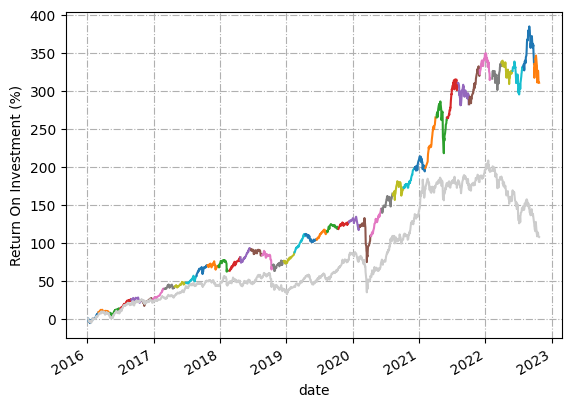

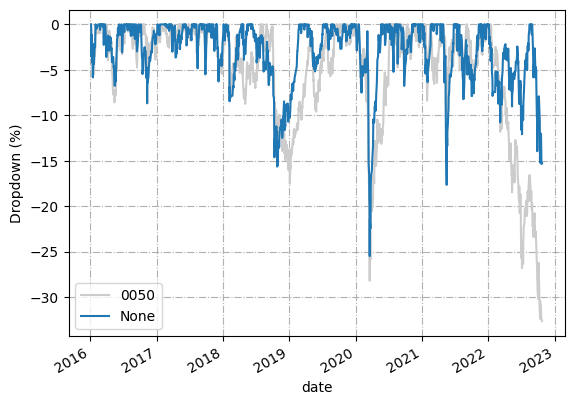

(2016-01-05    1.000000
 2016-01-06    0.990949
 2016-01-07    0.964294
 2016-01-08    0.988611
 2016-01-11    0.975135
                 ...   
 2022-10-18    4.266043
 2022-10-19    4.246715
 2022-10-20    4.175393
 2022-10-21    4.104336
 2022-10-24    4.106959
 Length: 1651, dtype: float64,
            buy_price  sell_price  lowest_price  highest_price   buy_date  \
 stock_id                                                                   
 1203       31.663599   31.246972     30.830346      31.663599 2016-01-05   
 1215       38.565572   39.076374     36.692630      39.076374 2016-01-05   
 1218       13.628580   14.031112     13.226048      14.031112 2016-01-05   
 1220       11.784393   11.729068     11.341787      11.784393 2016-01-05   
 1259       87.235811   90.434867     84.898039      90.434867 2016-01-05   
 ...              ...         ...           ...            ...        ...   
 8279      190.563225  176.050132    176.050132     206.338326 2022-09-27   
 8401       

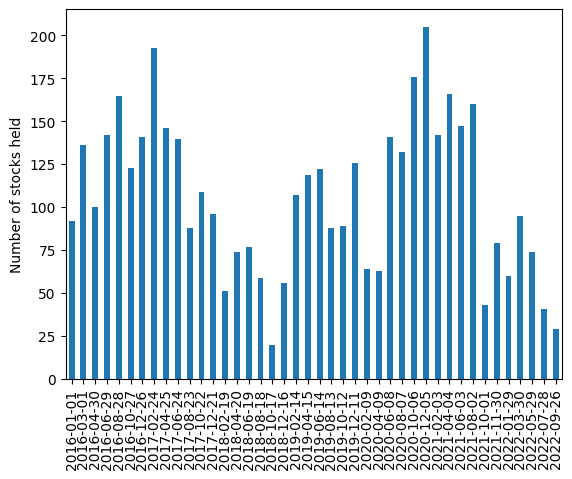

In [8]:
# 起手式
from finlab.backtest import backtest
from finlab.data import Data
import datetime
%matplotlib inline

# 回測
data = Data()
backtest(datetime.date(2016,1,1),
         datetime.date(2022,10,24), 60, mystrategy2, data)

# 更新持股投資張數

In [3]:
from finlab.backtest import portfolio

data = Data()

# 利用 mystrategy2 來產生股票清單 stocks
stocks = mystrategy2(data)

# 用portfolio來幫忙計算，給定 1000000 元，依照今天收盤價，股票張數要如何分配
p, total_invest_money = portfolio(stocks.index, 1000000, data)

# 印出股票資訊
print('---------------')
print('|  portfolio  |')
print('---------------')
print(p)
print('total cost')
print(total_invest_money)

estimate price according to 2022-11-09 00:00:00
initial number of stock 43
after considering fee 43
after considering 1000 share 24
---------------
|  portfolio  |
---------------
stock_id
1203    1.0
1336    1.0
1457    2.0
1517    1.0
2063    1.0
2221    1.0
2423    1.0
2468    1.0
3043    5.0
3128    1.0
3206    1.0
3531    1.0
3535    1.0
4129    1.0
4552    1.0
5013    1.0
5511    1.0
5902    1.0
6148    3.0
6197    1.0
8021    1.0
8072    1.0
8088    1.0
8401    2.0
Name: 2022-11-09 00:00:00, dtype: float64
total cost
770750.0
